CALIFORNIA_HOUSING_DATASET

In [69]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [70]:
print(digits['data'].dtype)

float64


In [71]:
print(type(digits['target']))

<class 'numpy.ndarray'>


In [72]:
print(digits['target'].dtype)

int32


In [73]:
print(len(digits['data']), len(digits['target']))

1797 1797


In [74]:
print(digits['data'].shape)

(1797, 64)


In [75]:
print(digits['target'].shape)

(1797,)


In [77]:
print(len(digits['target_names']))

10


In [78]:
print(digits['target_names'])

[0 1 2 3 4 5 6 7 8 9]


In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digits['data'], digits['target'], test_size = 0.20, random_state = 100)
print(len(x_train),len(x_test),len(y_train),len(y_test))

1437 360 1437 360


In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [81]:
prediction = knn.predict(x_test)

In [82]:
print(f'The score of the model is: {knn.score(x_test,y_test) : .2%}')

The score of the model is:  99.72%


METRICS

In [83]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true= y_test, y_pred=prediction)

In [84]:
confusion

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 26,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 36]], dtype=int64)

In [85]:
from sklearn.metrics import classification_report
names = [str(names) for names in digits['target_names']]
classification = classification_report(y_test, prediction, target_names = names)

In [86]:
print(classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.97      1.00      0.98        32
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        39
           8       1.00      0.96      0.98        27
           9       1.00      1.00      1.00        36

   micro avg       1.00      1.00      1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



TESTING THE DATA ON VARIOUS MODEL

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

estimators = {
    'KNeighborsClassifier':KNeighborsClassifier(n_neighbors = 3),
    'GaussianNB': GaussianNB(),
    'svc': SVC(gamma = 'scale')
}

for est,objects in estimators.items():
    kfold = KFold(n_splits= 10, random_state= 100, shuffle = True)
    scores = cross_val_score(estimator= objects,X= digits['data'], y= digits['target'], cv= kfold)
    print(f'{est:<15}' + f'Mean Score: {scores.mean() : .2%}' + f'Standard Deviation {scores.std(): .2%}')

KNeighborsClassifierMean Score:  98.83%Standard Deviation  0.88%
GaussianNB     Mean Score:  83.42%Standard Deviation  2.71%
svc            Mean Score:  98.83%Standard Deviation  0.73%


PARAMETER TUNING WITH KFOLD

In [88]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors = k)
    kfold = KFold(n_splits= 10, random_state= 100, shuffle=True)
    score = cross_val_score(estimator= knn, X= digits['data'], y = digits['target'],cv= kfold)
    print(f'k: {k:<5}' + f'Mean Score: {score.mean():.2%}' + f'Standard Deviation: {score.std(): 2%}')

k: 1    Mean Score: 98.77%Standard Deviation:  0.857751%
k: 3    Mean Score: 98.83%Standard Deviation:  0.881006%
k: 5    Mean Score: 98.72%Standard Deviation:  0.789310%
k: 7    Mean Score: 98.55%Standard Deviation:  0.970720%
k: 9    Mean Score: 98.55%Standard Deviation:  0.833399%
k: 11   Mean Score: 98.39%Standard Deviation:  1.011994%
k: 13   Mean Score: 98.27%Standard Deviation:  0.948639%
k: 15   Mean Score: 98.05%Standard Deviation:  0.874258%
k: 17   Mean Score: 97.94%Standard Deviation:  1.058235%
k: 19   Mean Score: 97.61%Standard Deviation:  1.086505%


SIMPLE EXAMPLE

In [89]:
c = lambda f : 5 / 9 * (f - 32)
temps = [(f,c(f)) for f in range(0,101,10)]

In [90]:
temps

[(0, -17.77777777777778),
 (10, -12.222222222222223),
 (20, -6.666666666666667),
 (30, -1.1111111111111112),
 (40, 4.444444444444445),
 (50, 10.0),
 (60, 15.555555555555557),
 (70, 21.11111111111111),
 (80, 26.666666666666668),
 (90, 32.22222222222222),
 (100, 37.77777777777778)]

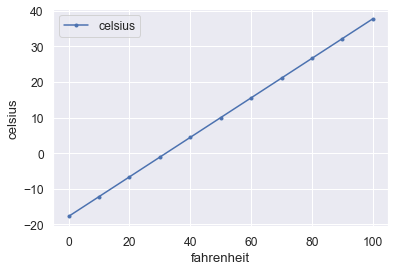

In [91]:
import pandas as pd
temps_df = pd.DataFrame(temps, columns = ['fahrenheit', 'celsius'])
axes = temps_df.plot(x = 'fahrenheit', y = 'celsius', style = '.-')
y_label = axes.set_ylabel('celsius')

CALIFORNIA HOUSING DATASET

In [93]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


C:\Users\Spicywords\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


In [94]:
print(type(california.data),type(california.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [96]:
print(california.feature_names, california.target)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'] [4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [97]:
print(california.data.shape,california.target.shape)

(20640, 8) (20640,)


In [98]:
import pandas as pd
california_df = pd.DataFrame(california.data, columns = california.feature_names)
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.33,41.0,6.98,1.02,322.0,2.56,37.88,-122.23
1,8.30,21.0,6.24,0.97,2401.0,2.11,37.86,-122.22
2,7.26,52.0,8.29,1.07,496.0,2.80,37.85,-122.24
3,5.64,52.0,5.82,1.07,558.0,2.55,37.85,-122.25
4,3.85,52.0,6.28,1.08,565.0,2.18,37.85,-122.25


In [99]:
california_df['MedHouseVal'] = california.target

In [100]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.33,41.0,6.98,1.02,322.0,2.56,37.88,-122.23,4.53
1,8.30,21.0,6.24,0.97,2401.0,2.11,37.86,-122.22,3.58
2,7.26,52.0,8.29,1.07,496.0,2.80,37.85,-122.24,3.52
3,5.64,52.0,5.82,1.07,558.0,2.55,37.85,-122.25,3.41
4,3.85,52.0,6.28,1.08,565.0,2.18,37.85,-122.25,3.42


In [101]:
sample_df = california_df.sample(frac = 0.1, random_state = 50)

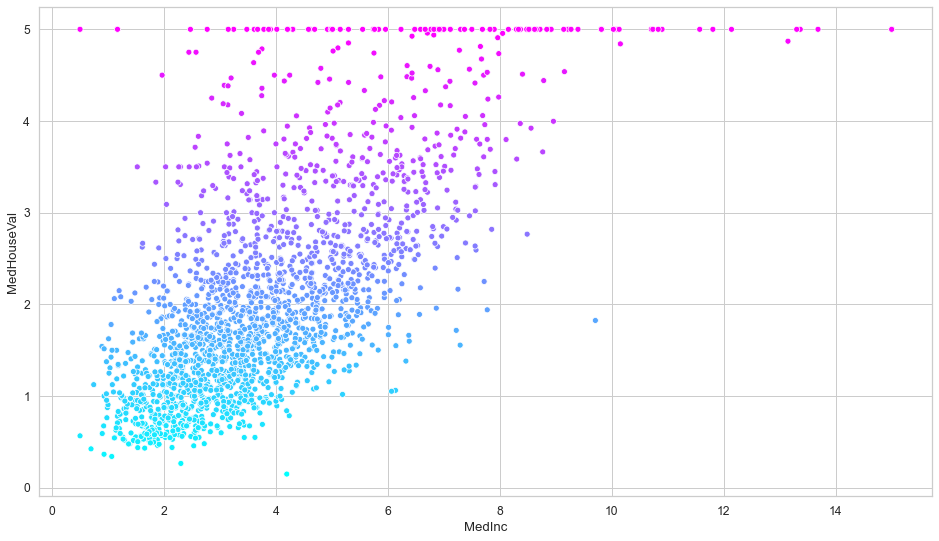

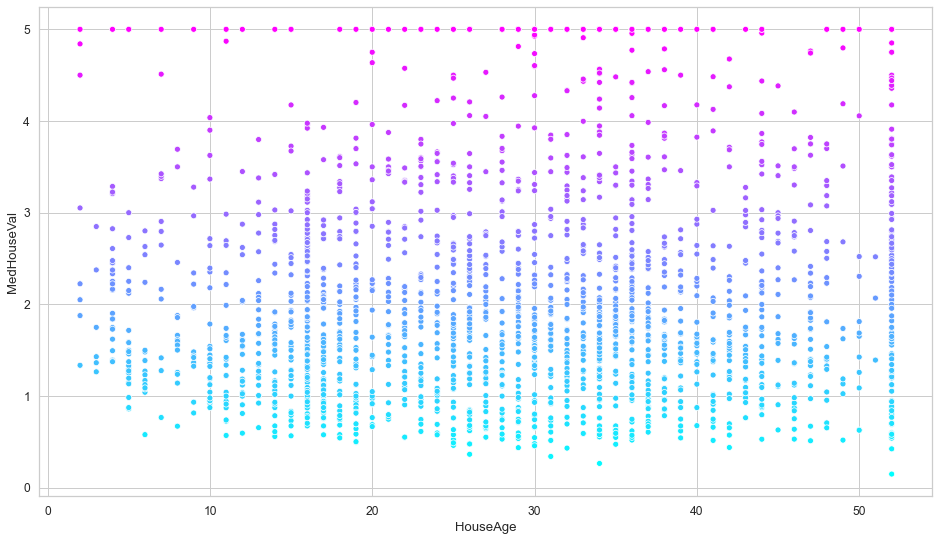

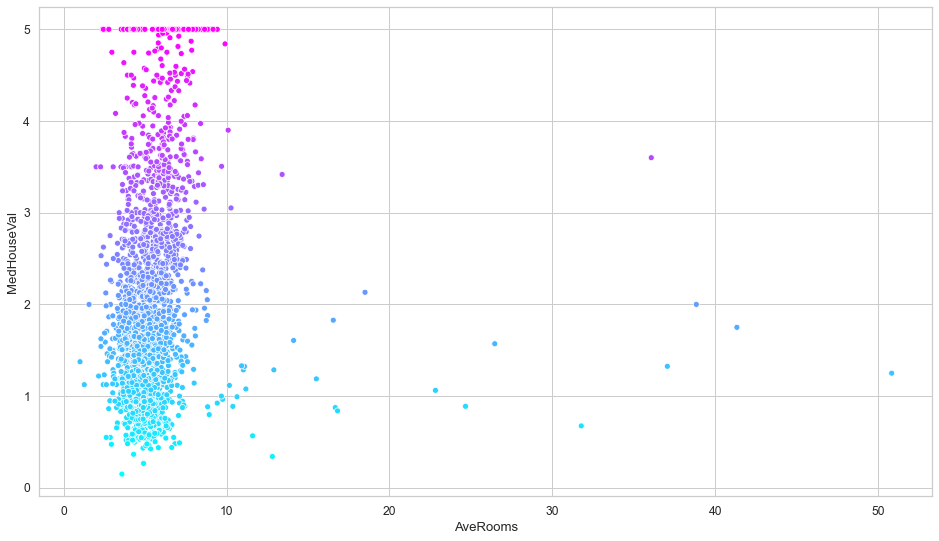

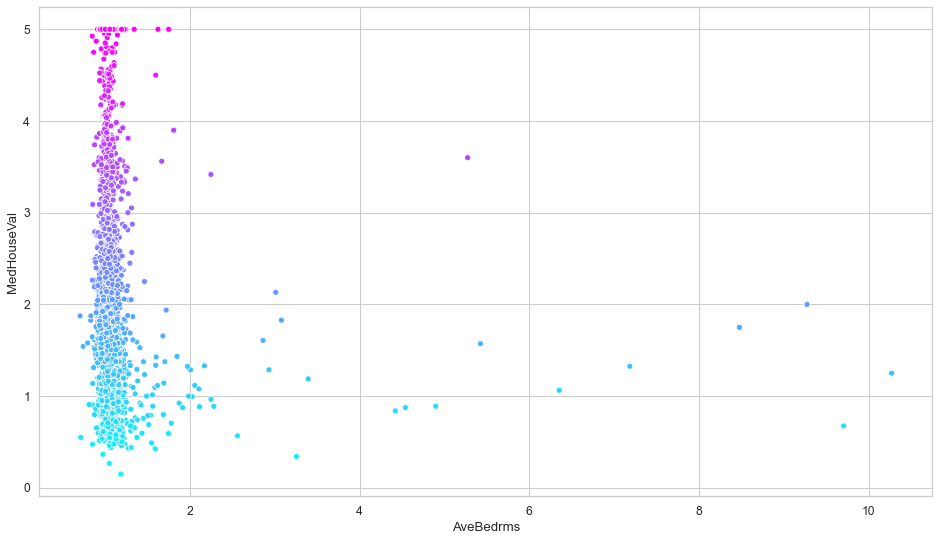

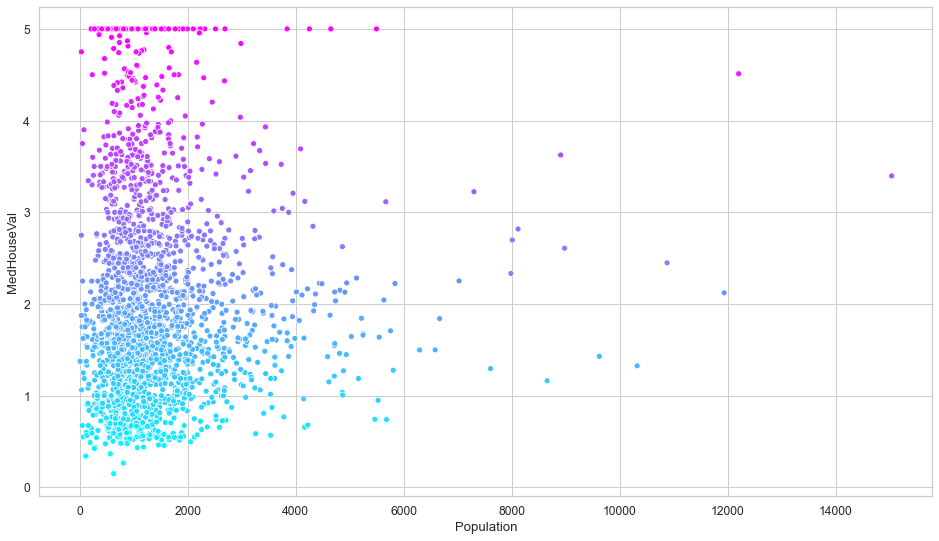

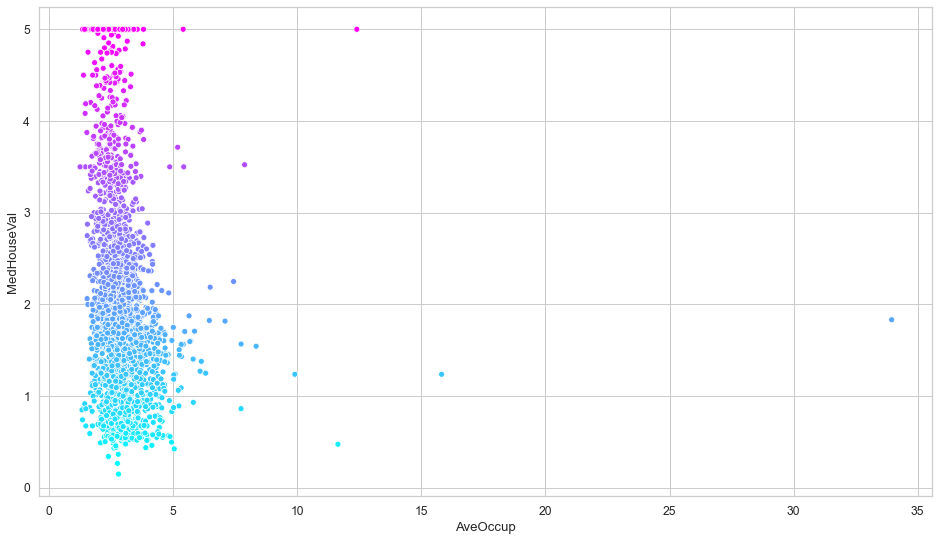

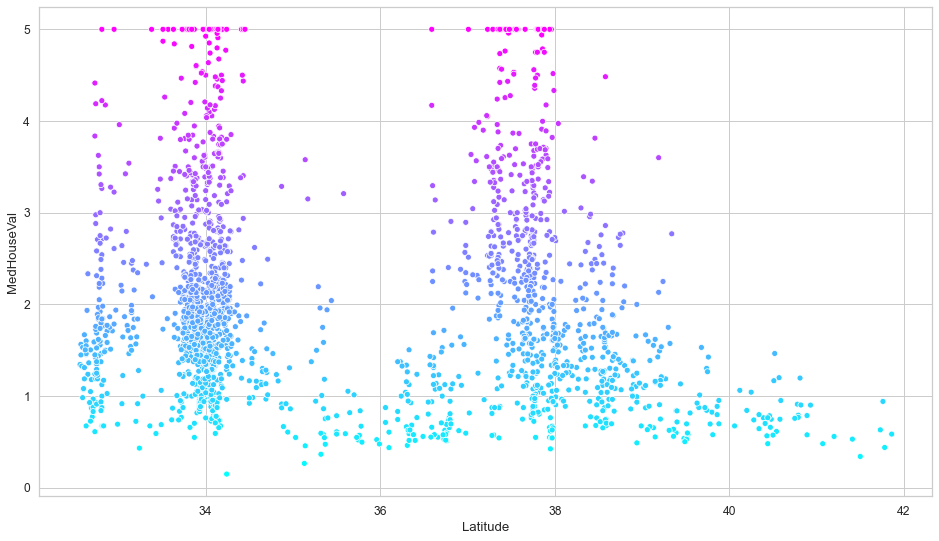

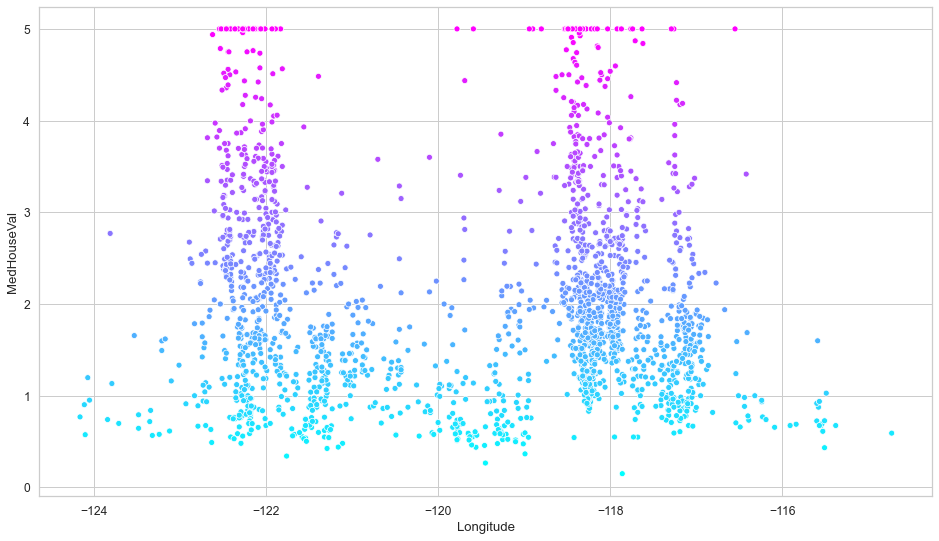

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
for feature in california.feature_names:
    plt.figure(figsize = (16, 9))
    axes = sns.scatterplot(data = sample_df, x = feature, y = 'MedHouseVal', hue = 'MedHouseVal',palette = 'cool', legend = False)

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.1,random_state = 100)

In [104]:
print(len(x_train),len(x_test),len(y_train),len(y_test))

18576 2064 18576 2064


In [105]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)
predicted = linear.predict(x_test)

In [106]:
print(predicted[:5])
print(y_test[:5])

[2.07580623 1.57033946 2.08971861 1.58294872 2.03952347]
[2.453 1.042 1.462 1.542 3.242]


In [107]:
for i,name in enumerate(california.feature_names):
    print(f'{name}   {linear.coef_[i]}')
    
print(f'The intercept is  {linear.intercept_}')

MedInc   0.4360497894008976
HouseAge   0.009429719120448918
AveRooms   -0.10581891215232149
AveBedrms   0.65421086419563
Population   -3.950784428481333e-06
AveOccup   -0.0036517970807472756
Latitude   -0.4219211958757034
Longitude   -0.43450781633161883
The intercept is  -36.93357815376703


In [108]:
expected = y_test
df = pd.DataFrame()
df['Predicted'] = predicted
df['Expected'] = expected
print(df)

      Predicted  Expected
0          2.08      2.45
1          1.57      1.04
2          2.09      1.46
3          1.58      1.54
4          2.04      3.24
...         ...       ...
2059       1.48      1.24
2060       1.90      1.65
2061       1.58      1.74
2062       3.78      3.46
2063       1.82      1.89

[2064 rows x 2 columns]


<AxesSubplot:xlabel='Expected', ylabel='Predicted'>

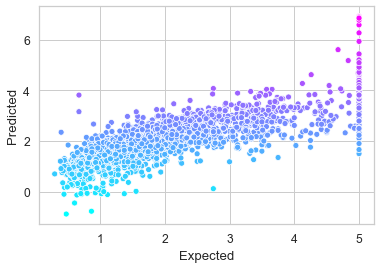

In [109]:
import seaborn as sns

sns.scatterplot(data = df, x = 'Expected', y = 'Predicted',hue = 'Predicted',palette = 'cool', legend = False)

In [110]:
predicted.min()

-0.8735140292506713

In [111]:
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)

(-0.8735140292506713, 6.918860573028596)

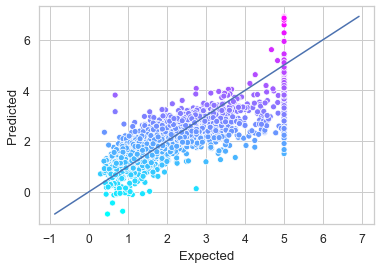

In [112]:
sns.set_style('whitegrid')
axes = sns.scatterplot(data = df, x = 'Expected', y = 'Predicted',hue = 'Predicted', palette = 'cool',legend = False)
plt.plot([start,end],[start,end])

In [113]:
from sklearn import metrics
metrics.r2_score(expected,predicted)

0.6111975972751253

In [114]:
metrics.mean_squared_error(expected,predicted)

0.5117242819193086

CROSS VALIDATION WITH KFOLD

In [115]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

estimators = {'LinearRegression':LinearRegression(),
              'ElasticNet': ElasticNet(),
              'Lasso': Lasso(),
              'Ridge': Ridge()
             }

In [116]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

for name,name_object in estimators.items():
    kfold = KFold(n_splits=10,random_state= 100, shuffle=True)
    score = cross_val_score(estimator=name_object, cv=kfold, X= california.data, y = california.target, scoring = 'r2')
    print(f'{name:<25}'+ f'Mean r^2: {score.mean(): .4f}')

LinearRegression         Mean r^2:  0.6040
ElasticNet               Mean r^2:  0.4225
Lasso                    Mean r^2:  0.2847
Ridge                    Mean r^2:  0.6040


# Unsupervised Learning

In [117]:
from sklearn.datasets import load_digits
digits = load_digits()

In [118]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components= 2, random_state = 100)


In [119]:
reduced = tsne.fit_transform(digits.data)

In [120]:
reduced.shape

(1797, 2)

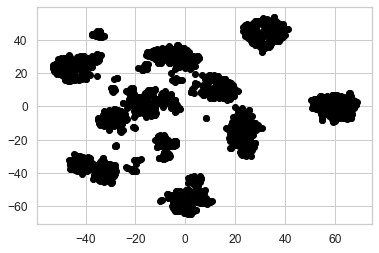

In [121]:
import matplotlib.pyplot as plt
dots = plt.scatter(reduced[:,0],reduced[:,1], c= 'black')

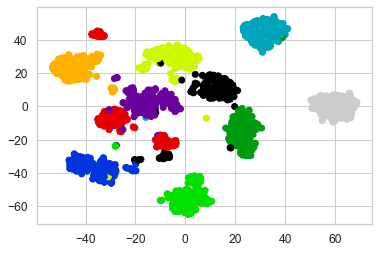

In [122]:
dots = plt.scatter(reduced[:,0],reduced[:,1],
                   c = digits.target, cmap = plt.cm.get_cmap('nipy_spectral_r',10))

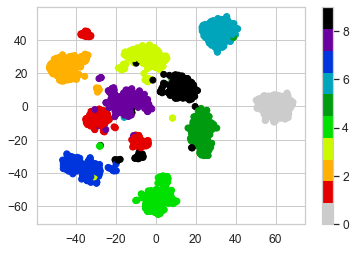

In [123]:
dots = plt.scatter(reduced[:,0],reduced[:,1],
                   c = digits.target, cmap = plt.cm.get_cmap('nipy_spectral_r',10))
colorbar = plt.colorbar(dots)

###Usupervised Learning Part 2

In [124]:
from sklearn.datasets import load_iris
iris = load_iris()

In [125]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [126]:
print(type(iris.data),type(iris.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [127]:
print(iris.data.shape,iris.target.shape)

(150, 4) (150,)


In [128]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [129]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [130]:
print(iris.target[:5])

[0 0 0 0 0]


In [131]:
import pandas as pd

In [132]:
iris_df = pd.DataFrame(iris.data,columns = iris.feature_names)

In [133]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [134]:
iris_df['species'] = [iris.target_names[name] for name in iris.target]

In [135]:
pd.set_option('precision',2)
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


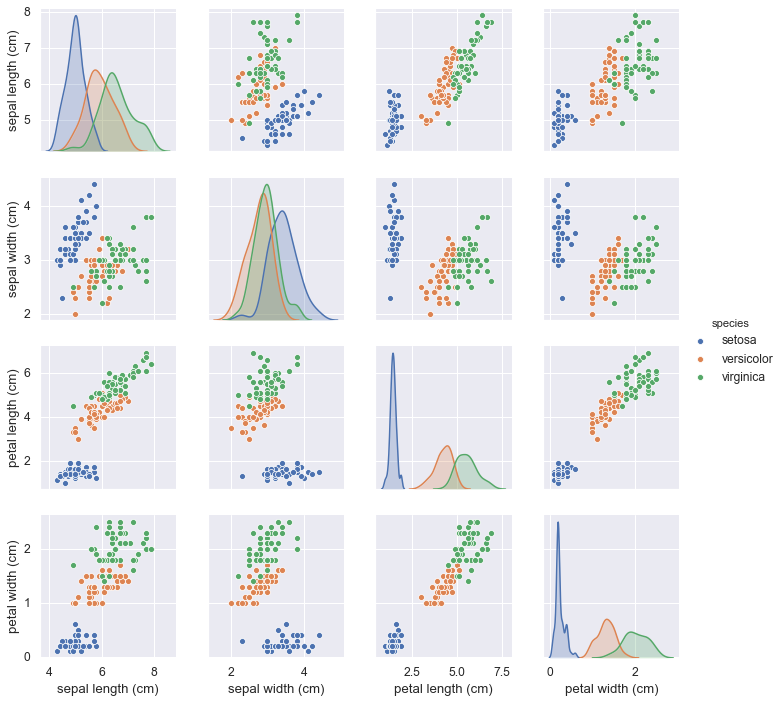

In [136]:
import seaborn as sns

sns.set_style('whitegrid')
sns.set(font_scale = 1.1)
grid = sns.pairplot(data = iris_df, vars = iris_df.columns[0:4], hue = 'species')

In [137]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 11)

In [138]:
kmeans.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=11, tol=0.0001, verbose=0)

In [139]:
print(kmeans.labels_[0:50])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [140]:
print(kmeans.labels_[50:100])

[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [141]:
print(kmeans.labels_[101:150])

[0 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2
 0 2 2 2 0 2 2 2 0 2 2 0]


In [142]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state = 11)

In [143]:
pca.fit(iris.data)
iris_pca = pca.transform(iris.data)

In [144]:
iris_pca.shape

(150, 2)

In [145]:
iris_pca_df = pd.DataFrame(iris_pca, columns = ['Component1','Component2'])

iris_pca_df['species'] = iris_df.species

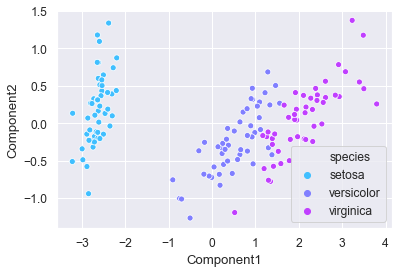

In [146]:
axes = sns.scatterplot(data = iris_pca_df, x = 'Component1', 
                       y = 'Component2', hue = 'species',legend = 'brief',
                      palette = 'cool')

In [147]:
iris_centers = pca.transform(kmeans.cluster_centers_)

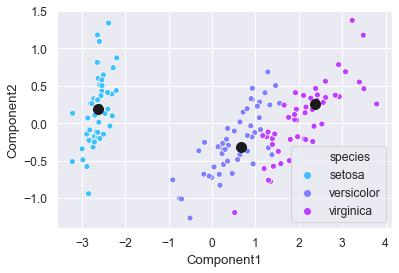

In [148]:
import matplotlib.pyplot as plt
axes = sns.scatterplot(data = iris_pca_df, x = 'Component1', 
                       y = 'Component2', hue = 'species',legend = 'brief',
                      palette = 'cool')
dots = plt.scatter(iris_centers[:,0], iris_centers[:,1], s = 100, c = 'k')

In [149]:
from sklearn.cluster import DBSCAN, MeanShift, SpectralClustering, AgglomerativeClustering

estimators = {
    'KMeans': kmeans,
    'DBSCAN': DBSCAN(),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters = 3),
    'AgglomerativeClustering':
        AgglomerativeClustering(n_clusters = 3)
}

In [150]:
import numpy as np
for name,name_object in estimators.items():
    name_object.fit(iris.data)
    print(f'{name:}')
    for i in range(0,101,50):
        print(i, '-', i + 50)
        label,count = np.unique(name_object.labels_[i:i+50], return_counts = True)
        for label,count in zip(label,count):
            print('   label= ',label, '  count = ', count)

KMeans
0 - 50
   label=  1   count =  50
50 - 100
   label=  0   count =  48
   label=  2   count =  2
100 - 150
   label=  0   count =  14
   label=  2   count =  36
DBSCAN
0 - 50
   label=  -1   count =  1
   label=  0   count =  49
50 - 100
   label=  -1   count =  6
   label=  1   count =  44
100 - 150
   label=  -1   count =  10
   label=  1   count =  40
MeanShift
0 - 50
   label=  1   count =  50
50 - 100
   label=  0   count =  49
   label=  1   count =  1
100 - 150
   label=  0   count =  50
SpectralClustering
0 - 50
   label=  1   count =  50
50 - 100
   label=  0   count =  50
100 - 150
   label=  0   count =  15
   label=  2   count =  35
AgglomerativeClustering
0 - 50
   label=  1   count =  50
50 - 100
   label=  0   count =  49
   label=  2   count =  1
100 - 150
   label=  0   count =  15
   label=  2   count =  35
